Group Members- Rashik Iram Chowdhury (2111336642), Zarin Akter (2011704042) and Md. Mutasim Farhan (2013123642)

# Loading the dataset and adjusting it to our criterion

**Binary Classification Using OneR**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("G:\\Assignment\\DT-BrainCancer.csv")
df.head(5)


,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1


In [2]:
df.columns

Index(['Unnamed: 0', 'sex', 'diagnosis', 'loc', 'ki', 'gtv', 'status'], dtype='object')

In [3]:
len(df) #Total Instances/Samples

88

In [4]:
df.isnull().sum()

Unnamed: 0    0
sex           0
diagnosis     1
loc           0
ki            0
gtv           0
status        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     int64  
 5   gtv         88 non-null     float64
 6   status      88 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ KB


In [6]:
df.dropna(subset=['diagnosis'], inplace=True)
df.isnull().sum()

Unnamed: 0    0
sex           0
diagnosis     0
loc           0
ki            0
gtv           0
status        0
dtype: int64

Now there is no missing value in this dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  87 non-null     int64  
 1   sex         87 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         87 non-null     object 
 4   ki          87 non-null     int64  
 5   gtv         87 non-null     float64
 6   status      87 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.4+ KB


**Handling categorical values or encoding**

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [9]:
df['sex'] = le.fit_transform(df['sex'])
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df['loc'] = le.fit_transform(df['loc'])

In [10]:
df.head(10)

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,0,2,0,90,6.11,0
1,2,1,0,1,90,19.35,1
2,3,0,2,0,70,7.95,0
3,4,0,1,1,80,7.61,1
4,5,1,0,1,90,5.06,1
5,6,0,2,1,80,4.82,0
6,7,1,2,1,80,3.19,0
7,8,1,1,1,80,12.37,0
8,9,0,2,1,70,12.16,0
9,10,1,0,1,100,2.53,0


In [11]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status


In [12]:
X = df.drop(columns=['status'])
y = df['status']

In [13]:
X

,Unnamed: 0,sex,diagnosis,loc,ki,gtv
0,1,0,2,0,90,6.11
1,2,1,0,1,90,19.35
2,3,0,2,0,70,7.95
3,4,0,1,1,80,7.61
4,5,1,0,1,90,5.06
...,...,...,...,...,...,...
83,84,1,0,1,80,0.16
84,85,1,0,1,80,19.81
85,86,1,2,1,90,2.50
86,87,1,2,1,90,2.02


In [14]:
y

0     0
1     1
2     0
3     1
4     1
     ..
83    1
84    1
85    0
86    0
87    0
Name: status, Length: 87, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)


print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Testing Size: ", len(X_test))

Total Samples:  87
Training Size:  65
Testing Size:  22


In [16]:
X_train

,Unnamed: 0,sex,diagnosis,loc,ki,gtv
59,60,0,2,1,90,2.47
79,80,0,2,0,70,2.94
32,33,0,3,0,70,13.45
31,32,1,2,1,90,2.56
86,87,1,2,1,90,2.02
...,...,...,...,...,...,...
29,30,0,2,1,90,4.72
10,11,1,1,1,80,0.14
74,75,1,3,1,100,24.91
34,35,0,2,1,90,7.30


# Feature Engineering

In [17]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

In [18]:
from mlxtend.classifier import OneRClassifier
oner = OneRClassifier()

oner.fit(X_train_np, y_train)

C:\Users\User\anaconda3\envs\gpu\lib\site-packages\mlxtend\classifier\oner.py:90: UserWarning: Feature array likely contains at least one non-categorical column. Column 0 appears to have a unique value in every row.
  warnings.warn(


OneRClassifier()

In [19]:
y_pred1 = oner.predict(X_train_np)
y_pred2 = oner.predict(X_test_np)

train_acc = np.mean(y_pred1 == y_train) 
test_acc = np.mean(y_pred2 == y_test)
print(f'Training accuracy {train_acc*100:.2f}%')
print(f'Testing accuracy {test_acc*100:.2f}%')

Training accuracy 100.00%
Testing accuracy 59.09%


In [20]:
import numpy as np

# Reshape y_test to match the shape of y_test_predict
y_test_predict = y_pred2
y_test = np.squeeze(y_test)

unique_labels = np.unique(np.concatenate([y_test, y_test_predict]))
confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))

# Update confusion matrix
for true_label, pred_label in zip(y_test, y_test_predict):
    true_idx = np.where(unique_labels == true_label)[0][0]
    pred_idx = np.where(unique_labels == pred_label)[0][0]
    confusion_matrix[true_idx, pred_idx] += 1

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[13.  0.]
 [ 9.  0.]]


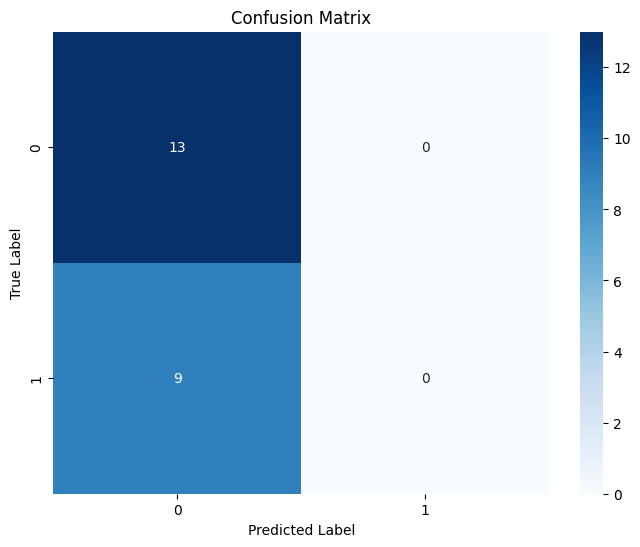

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [22]:
precision_per_class = []
recall_per_class = []
fscore_per_class = []

for class_label in np.unique(y_test):
    true_positives = np.sum((y_test == class_label) & (y_test_predict == class_label))
    false_positives = np.sum((y_test != class_label) & (y_test_predict == class_label))
    false_negatives = np.sum((y_test == class_label) & (y_test_predict != class_label))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fscore = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    precision_per_class.append(precision)
    recall_per_class.append(recall)
    fscore_per_class.append(fscore)

# Compute average precision, recall, and F-score across all classes
average_precision = np.mean(precision_per_class)
average_recall = np.mean(recall_per_class)
average_fscore = np.mean(fscore_per_class)

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F-score: {average_fscore}")

Average Precision: 0.29545454545454547
Average Recall: 0.5
Average F-score: 0.37142857142857144


**Multi Class Classification Using OneR**

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
car_evaluation = fetch_ucirepo(id=19) 
  
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [2]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)


print("Total Samples: ", len(X))
print("Training Size: ", len(X_train))
print("Testing Size: ", len(X_test))

Total Samples:  1728
Training Size:  1382
Testing Size:  346


In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have your X_test DataFrame
# First, let's create a OneHotEncoder object
onehot_encoder = OneHotEncoder()

# Assuming you have your X_train DataFrame, let's fit the encoder to your training data
X_train_encoded = onehot_encoder.fit_transform(X_train)

# Transform X_test using the same encoder
X_test_encoded = onehot_encoder.transform(X_test)


C:\Users\User\anaconda3\envs\gpu\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\envs\gpu\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
from mlxtend.classifier import OneRClassifier
import numpy as np

# Convert sparse matrices to dense arrays
X_train_dense = X_train_encoded.toarray()
X_test_dense = X_test_encoded.toarray()

# Create and fit the OneRClassifier
oner = OneRClassifier()
oner.fit(X_train_dense, y_train_encoded)

# Make predictions on the test data
y_pred_train = oner.predict(X_train_dense)
y_pred_test = oner.predict(X_test_dense)

In [5]:
train_acc = np.mean(y_pred_train == y_train_encoded)  
print(f'Training accuracy {train_acc*100:.2f}%')
test_acc = np.mean(y_pred_test == y_test_encoded)  
print(f'Testing accuracy {test_acc*100:.2f}%')

Training accuracy 70.04%
Testing accuracy 69.94%


In [6]:
import numpy as np

# Reshape y_test to match the shape of y_test_predict
y_test_predict = y_pred_test
y_test = y_test_encoded

unique_labels = np.unique(np.concatenate([y_test, y_test_predict]))
confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))

# Update confusion matrix
for true_label, pred_label in zip(y_test, y_test_predict):
    true_idx = np.where(unique_labels == true_label)[0][0]
    pred_idx = np.where(unique_labels == pred_label)[0][0]
    confusion_matrix[true_idx, pred_idx] += 1

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[  0.   0.  77.   0.]
 [  0.   0.  14.   0.]
 [  0.   0. 242.   0.]
 [  0.   0.  13.   0.]]


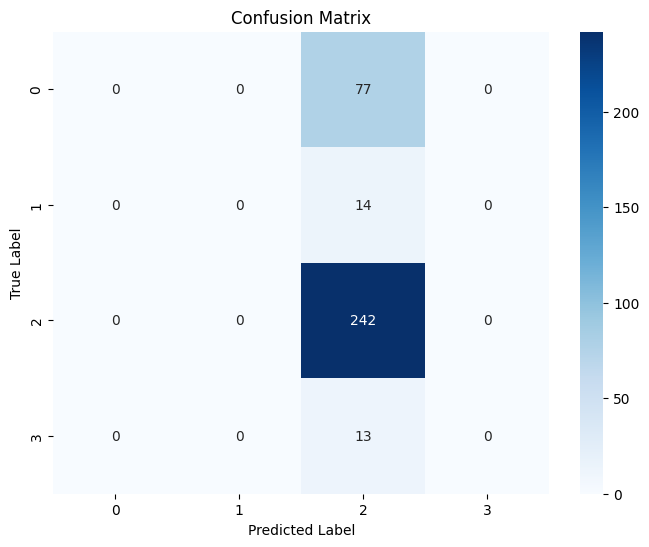

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
precision_per_class = []
recall_per_class = []
fscore_per_class = []

for class_label in np.unique(y_test):
    true_positives = np.sum((y_test == class_label) & (y_test_predict == class_label))
    false_positives = np.sum((y_test != class_label) & (y_test_predict == class_label))
    false_negatives = np.sum((y_test == class_label) & (y_test_predict != class_label))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fscore = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    precision_per_class.append(precision)
    recall_per_class.append(recall)
    fscore_per_class.append(fscore)

# Compute average precision, recall, and F-score across all classes
average_precision = np.mean(precision_per_class)
average_recall = np.mean(recall_per_class)
average_fscore = np.mean(fscore_per_class)

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F-score: {average_fscore}")

Average Precision: 0.17485549132947978
Average Recall: 0.25
Average F-score: 0.20578231292517007
